## Installing pvlib-python
- create virtual enviroment & install pylib (details can be found at https://pvlib-python.readthedocs.io/en/stable/api.html)

**conda create -n pvlib -c conda-forge pvlib-python; conda activate pvlib**

- install pre-requisite

**pip install siphon**

**conda install netCDF4**

- install jupyter-notebook
**anaconda-navigator**

**--> check virtual environmnent and install jupyter-notebook**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP



/home/adun6414/Downloads/anaconda3/envs/pvlib/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [7]:
# specify location (Tucson, AZ)
latitude, longitude, tz = 32.2, -110.9, 'US/Arizona'

# specify time range.
start = pd.Timestamp('2020-06-22 00:00:00', tz=tz)
end = start + pd.Timedelta(days=7)
irrad_vars = ['ghi', 'dni', 'dhi']

In [8]:
start

Timestamp('2020-06-22 00:00:00-0700', tz='US/Arizona')

### GFS 
The Global Forecast System (GFS) is the US model that provides forecasts for the entire globe. The GFS is updated every 6 hours. The GFS is run at two resolutions, 0.25 deg and 0.5 deg, and is available with 3 hour time resolution. Forecasts from GFS model were shown above. Use the GFS, among others, if you want forecasts for 1-7 days or if you want forecasts for anywhere on Earth.

In [9]:
model = GFS()

In [10]:
# retrieve data. returns pandas.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)

raw_data.head()

,Temperature_surface,Total_cloud_cover_high_cloud_Mixed_intervals_Average,Total_cloud_cover_low_cloud_Mixed_intervals_Average,Total_cloud_cover_convective_cloud,Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average,Total_cloud_cover_boundary_layer_cloud_Mixed_intervals_Average,Wind_speed_gust_surface,Total_cloud_cover_middle_cloud_Mixed_intervals_Average,Downward_Short-Wave_Radiation_Flux_surface_Mixed_intervals_Average,u-component_of_wind_isobaric,v-component_of_wind_isobaric
2020-06-22 09:00:00-07:00,295.327454,0.0,0.0,0.0,0.0,0.0,4.906023,0.0,0.0,1.275703,4.795496
2020-06-22 12:00:00-07:00,292.799988,0.0,0.0,0.0,0.0,0.0,3.037640,0.0,0.0,1.840432,2.442791
2020-06-22 15:00:00-07:00,310.799988,0.0,0.0,0.0,0.0,0.0,1.714685,0.0,200.0,0.557478,1.500012
2020-06-22 18:00:00-07:00,329.428528,0.0,0.0,0.0,0.0,0.0,2.302846,0.0,493.0,1.328101,-1.793154
2020-06-22 21:00:00-07:00,331.784790,0.0,0.0,0.0,0.0,0.0,3.563236,0.0,1040.0,0.314875,-2.925230


In [11]:
data = model.process_data(raw_data)
data.head()
data.to_csv('solar_data.csv')


In [7]:
processed_data = model.get_processed_data(latitude, longitude, start, end)
processed_data.head()

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-06-23 06:00:00-07:00,23.850006,2.510747,59.792298,151.496325,41.014040,0.0,0.0,0.0,0.0
2020-06-23 09:00:00-07:00,21.502289,2.720846,673.385679,798.785975,118.104149,0.0,0.0,0.0,0.0
2020-06-23 12:00:00-07:00,19.050018,0.686683,1000.393823,773.613133,239.735752,0.0,0.0,0.0,0.0
2020-06-23 15:00:00-07:00,38.250000,0.577504,814.229787,799.286082,159.230136,0.0,0.0,0.0,0.0
2020-06-23 18:00:00-07:00,55.450012,2.797114,233.889242,560.395731,65.920993,0.0,0.0,0.0,0.0


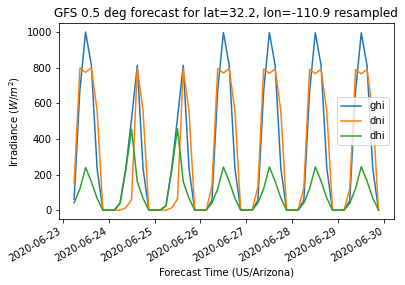

In [8]:
# interpolate the irradiance directly 
processed_data[irrad_vars].plot()
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

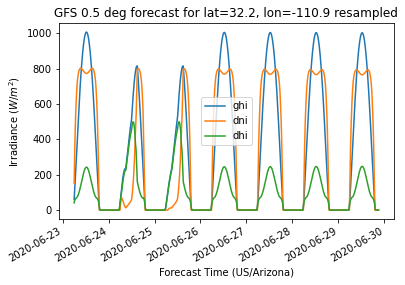

In [9]:
# interpolate the total cloud and then calculate the irradiance
resampled_data = processed_data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot();

plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

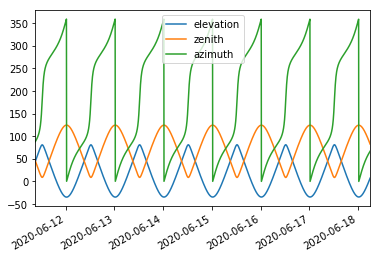

In [18]:
model.location.get_solarposition(resampled_data.index)[['elevation','zenith','azimuth']].plot()

### GFS 
The Global Forecast System (GFS) is the US model that provides forecasts for the entire globe. The GFS is updated every 6 hours. The GFS is run at two resolutions, 0.25 deg and 0.5 deg, and is available with 3 hour time resolution. Forecasts from GFS model were shown above. Use the GFS, among others, if you want forecasts for 1-7 days or if you want forecasts for anywhere on Earth. (source: https://pvlib-python.readthedocs.io/en/v0.6.0/forecasts.html)

In [87]:
model = GFS()

In [88]:
# specify time range.
start = pd.Timestamp(datetime.datetime.utcnow(), tz='UTC')
end = start + pd.Timedelta(days=2)
print(start)

data = model.get_processed_data(latitude, longitude, start, end)
data.index = data.index.tz_convert(tz)
data

2020-06-12 20:16:43.460000+00:00


,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-06-12 14:00:00-07:00,54.126190,7.329607,933.770295,798.736938,198.939649,0.0,0.0,0.0,0.0
2020-06-12 17:00:00-07:00,44.513672,7.473678,444.151537,756.310779,75.299074,0.0,0.0,0.0,0.0
2020-06-12 20:00:00-07:00,30.125793,7.091949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-12 23:00:00-07:00,25.429596,2.200953,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-13 02:00:00-07:00,23.044586,2.478338,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-13 05:00:00-07:00,22.492523,3.277944,0.000000,0.000000,0.000000,35.0,0.0,35.0,0.0
2020-06-13 08:00:00-07:00,35.388916,4.165277,364.598266,291.829278,210.747294,39.0,0.0,39.0,0.0
2020-06-13 11:00:00-07:00,52.633270,5.044067,791.316073,429.678216,388.955205,26.0,0.0,26.0,0.0
2020-06-13 14:00:00-07:00,53.350006,8.203047,745.832270,365.578690,409.335819,31.0,0.0,31.0,0.0
2020-06-13 17:00:00-07:00,43.047180,9.300968,375.684679,439.267649,161.016271,24.0,0.0,24.0,0.0


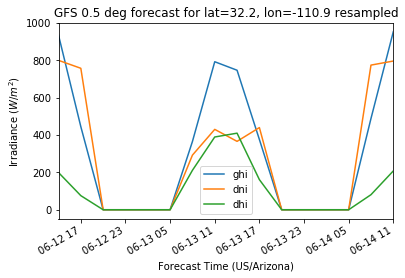

In [86]:
data[irrad_vars].plot()
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

### HRRR 
The High Resolution Rapid Refresh (HRRR) model is perhaps the most accurate model, however, it is only available for ~15 hours. It is updated every hour and runs at 3 km resolution. The HRRR excels in severe weather situations. See the NOAA ESRL HRRR page for more information. Use the HRRR, among others, if you want forecasts for less than 24 hours. The HRRR model covers the continental United States. (source: https://pvlib-python.readthedocs.io/en/v0.6.0/forecasts.html)

In [81]:
model = HRRR()

In [82]:
# specify time range.
start = pd.Timestamp(datetime.datetime.utcnow(), tz='UTC')
end = start + pd.Timedelta(days=2)
print(start)

data = model.get_processed_data(latitude, longitude, start, end)
data.index = data.index.tz_convert(tz)
data

2020-06-12 18:28:46.540000+00:00


,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-06-12 12:00:00-07:00,29.019073,5.654968,1003.006963,776.391647,239.359125,0.500,0.0,0.500,0.0
2020-06-12 13:00:00-07:00,31.379639,4.808081,998.223063,782.328029,233.146363,0.250,0.0,0.250,0.0
2020-06-12 14:00:00-07:00,31.387482,6.619474,932.252862,794.472476,201.345481,0.250,0.0,0.250,0.0
2020-06-12 15:00:00-07:00,32.606598,5.191370,806.772909,794.416021,160.384789,1.125,0.0,1.125,0.0
2020-06-12 16:00:00-07:00,32.474243,6.528216,645.376089,808.408205,106.800234,0.000,0.0,0.000,0.0
2020-06-12 17:00:00-07:00,31.945557,6.568740,444.151537,756.310779,75.299074,0.000,0.0,0.000,0.0
2020-06-12 18:00:00-07:00,32.032257,5.775004,226.947172,566.570515,62.485561,0.000,0.0,0.000,0.0
2020-06-12 19:00:00-07:00,31.267059,6.942283,33.041791,46.795194,28.951971,0.000,0.0,0.000,0.0
2020-06-12 20:00:00-07:00,29.597534,4.479568,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.0
2020-06-12 21:00:00-07:00,28.297333,3.584201,0.000000,0.000000,0.000000,0.000,0.0,0.000,0.0


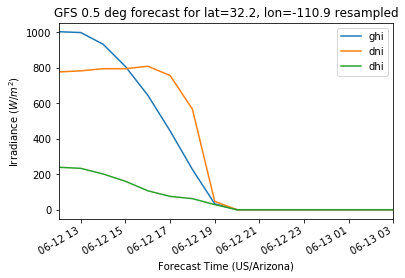

In [83]:
data[irrad_vars].plot()
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

### RAP 
The Rapid Refresh (RAP) model is the parent model for the HRRR. It is updated every hour and runs at 40, 20, and 13 km resolutions. Only the 20 and 40 km resolutions are currently available in pvlib. It is also excels in severe weather situations. See the NOAA ESRL HRRR page for more information. Use the RAP, among others, if you want forecasts for less than 24 hours. The RAP model covers most of North America. (source: https://pvlib-python.readthedocs.io/en/v0.6.0/forecasts.html)

In [76]:
model = RAP()

In [10]:
# specify time range.
start = pd.Timestamp(datetime.datetime.utcnow(), tz='UTC')
end = start + pd.Timedelta(days=2)
print(start)

data = model.get_processed_data(latitude, longitude, start, end)
data.index = data.index.tz_convert(tz)
data

2020-06-23 04:34:40.775272+00:00


,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-06-22 23:00:00-07:00,23.850006,2.510747,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 02:00:00-07:00,21.502289,2.720846,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 05:00:00-07:00,19.050018,0.686683,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-23 08:00:00-07:00,38.250000,0.577504,477.850773,757.752108,82.737748,0.0,0.0,0.0,0.0
2020-06-23 11:00:00-07:00,55.450012,2.797114,944.595465,784.072040,212.103378,0.0,0.0,0.0,0.0
2020-06-23 14:00:00-07:00,60.284271,2.490655,932.822905,785.991189,206.673663,0.0,0.0,0.0,0.0
2020-06-23 17:00:00-07:00,47.752838,3.403320,449.445967,744.666881,79.786580,0.0,0.0,0.0,0.0
2020-06-23 20:00:00-07:00,29.869537,6.725908,0.000000,0.000000,0.000000,19.0,0.0,0.0,19.0
2020-06-23 23:00:00-07:00,24.525482,1.874125,0.000000,0.000000,0.000000,52.0,0.0,0.0,52.0
2020-06-24 02:00:00-07:00,21.808502,0.959297,0.000000,0.000000,0.000000,100.0,0.0,0.0,100.0


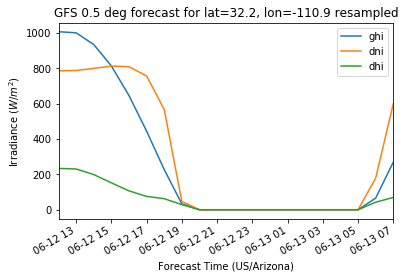

In [78]:
data[irrad_vars].plot()
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

### NAM
The North American Mesoscale model covers the whole North America. It is updated every 6 hours. pvlib provides access to 20 km resolution NAM data with a time horizon of up to 4 days. (source: https://pvlib-python.readthedocs.io/en/v0.6.0/forecasts.html)

In [73]:
model = NAM()

In [74]:
# specify time range.
start = pd.Timestamp(datetime.datetime.utcnow(), tz='UTC')
end = start + pd.Timedelta(days=2)
print(start)

data = model.get_processed_data(latitude, longitude, start, end)
data.index = data.index.tz_convert(tz)
data

2020-06-12 18:27:37.034000+00:00


,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-06-12 12:00:00-07:00,50.447693,5.063655,1006.277367,785.530382,233.640800,0.0,0.0,0.0,0.0
2020-06-12 13:00:00-07:00,51.107697,4.930936,993.348860,768.509802,241.785678,1.0,0.0,1.0,0.0
2020-06-12 14:00:00-07:00,50.857697,4.618976,927.700783,781.425882,208.796149,1.0,0.0,1.0,0.0
2020-06-12 15:00:00-07:00,49.567688,4.214286,754.606684,626.319144,244.993026,11.0,0.0,11.0,0.0
2020-06-12 16:00:00-07:00,47.463501,3.904606,557.282253,513.510655,215.172365,21.0,0.0,21.0,0.0
2020-06-12 17:00:00-07:00,44.400543,3.805931,406.620699,586.376615,120.645060,13.0,0.0,13.0,0.0
2020-06-12 18:00:00-07:00,40.399353,3.811904,226.947172,566.570515,62.485561,0.0,0.0,0.0,0.0
2020-06-12 19:00:00-07:00,35.084076,4.968377,33.041791,46.795194,28.951971,0.0,0.0,0.0,0.0
2020-06-12 20:00:00-07:00,30.470825,4.907569,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2020-06-12 21:00:00-07:00,27.407623,3.888768,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


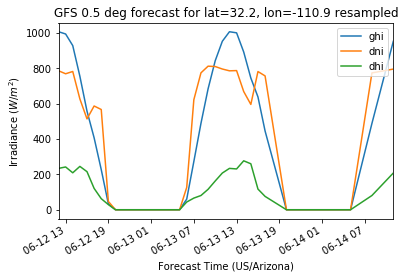

In [75]:
data[irrad_vars].plot()
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude, longitude));
plt.legend();

### NDFD
The National Digital Forecast Database is not a model, but rather a collection of forecasts made by National Weather Service offices across the country. It is updated every 6 hours. Use the NDFD, among others, for forecasts at all time horizons. The NDFD is available for the United States. (source: https://pvlib-python.readthedocs.io/en/v0.6.0/forecasts.html)

In [79]:
model = NDFD()

In [80]:
# specify time range.
start = pd.Timestamp(datetime.datetime.utcnow(), tz='UTC')
end = start + pd.Timedelta(days=2)
print(start)

data = model.get_processed_data(latitude, longitude, start, end)
data.index = data.index.tz_convert(tz)
data

2020-06-12 18:27:54.078000+00:00


HTTPError: Error accessing https://thredds.ucar.edu/thredds/ncss/grib/NCEP/NDFD/NWS/CONUS/CONDUIT/Best?var=Wind_speed_surface&var=Total_cloud_cover_surface&var=Temperature_surface&var=Wind_speed_gust_surface&time_start=2020-06-12T18%3A27%3A54.078000%2B00%3A00&time_end=2020-06-14T18%3A27%3A54.078000%2B00%3A00&latitude=32.2&longitude=-110.9&vertCoord=100000&accept=netcdf
Server Error (400: Variable: Wind_speed_surface is not contained in the requested dataset)

In [45]:
start

Timestamp('2020-06-12 10:39:49.098000-0700', tz='US/Arizona')